# Financial Planning


In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
load_dotenv('.env')

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

today = pd.Timestamp("2021-03-24", tz="America/New_York").isoformat()

tickers = ["AGG", "SPY"]

timeframe = "1D"
portfolio_df = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_px = requests.get(btc_url)
eth_px = requests.get(eth_url)

btc_response = btc_px.content
eth_response = eth_px.content

btc_data = btc_px.json()
eth_data = eth_px.json()

In [3]:
portfolio_df

AGG                                  SPY          \
                            open   high     low   close   volume open    high   
time                                                                            
2021-03-24 00:00:00-04:00  113.9  114.2  113.86  114.17  4329752  391  392.75   

                                                     
                              low   close    volume  
time                                                 
2021-03-24 00:00:00-04:00  387.49  387.53  84449100

In [4]:
my_btc = 1.2
my_eth = 5.3

my_agg = 200
my_spy = 50

monthly_income = 12000

In [5]:
btc_px = btc_data['data']['1']['quotes']['USD']['price']
eth_px = eth_data['data']['1027']['quotes']['USD']['price']

my_btc_mv = my_btc * btc_px
my_eth_mv = my_eth * eth_px
my_crypto_mv = round(my_btc_mv + my_eth_mv,2)

agg_close_px = portfolio_df["AGG"]["close"].item()
spy_close_px = portfolio_df["SPY"]["close"].item()

my_agg_mv = agg_close_px * my_agg
my_spy_mv = spy_close_px * my_spy
my_stock_mv = round(my_agg_mv + my_spy_mv,2)

my_total_mv = my_crypto_mv + my_stock_mv

print(f"The current value of your {my_btc:0.2f} BTC at ${btc_px:0.2f} is ${my_btc_mv:0.2f}")
print(f"The current value of your {my_eth:0.2f} ETH at ${eth_px:0.2f} is ${my_eth_mv:0.2f}")
print(f"The current value of your crpytocurrency portfolio is ${my_crypto_mv:0.2f}")
print()
print(f"Current AGG closing price: ${agg_close_px:0.2f}")
print(f"Current SPY closing price: ${spy_close_px:0.2f}")
print()
print(f"The current value of your {my_spy} SPY shares at closing price of ${spy_close_px:0.2f} is ${my_spy_mv:0.2f}")
print(f"The current value of your {my_agg} AGG shares at closing price of ${agg_close_px:0.2f} is ${my_agg_mv:0.2f}")
print(f"The current value of your stocks portfolio is ${my_stock_mv:0.2f}")
print()
print(f"The current value of your total portfolio is ${my_total_mv:0.2f}")

The current value of your 1.20 BTC at $52853.00 is $63423.60
The current value of your 5.30 ETH at $1589.31 is $8423.34
The current value of your crpytocurrency portfolio is $71846.94

Current AGG closing price: $114.17
Current SPY closing price: $387.53

The current value of your 50 SPY shares at closing price of $387.53 is $19376.50
The current value of your 200 AGG shares at closing price of $114.17 is $22834.00
The current value of your stocks portfolio is $42210.50

The current value of your total portfolio is $114057.44


### Savings Health Analysis

In [6]:
portfolio_dictionary = {'Amount': [my_crypto_mv, my_stock_mv]}
df_savings = pd.DataFrame(portfolio_dictionary, index=['Cryptocurrencies','Stocks'])

display(df_savings)

,Amount
Cryptocurrencies,71846.94
Stocks,42210.50


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

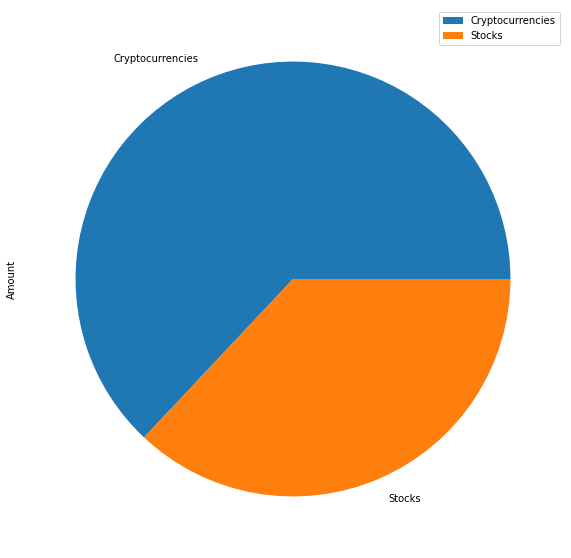

In [7]:
df_savings.plot(kind='pie', subplots=True, figsize=(20,10))

In [8]:
emergency_fund = monthly_income * 3
total_savings = df_savings.sum().item()
funds_needed = emergency_fund - total_savings

if total_savings == emergency_fund:
    print(f"Congratulations! You have reached your goal of saving three times of your monthly income in your emergency fund.")
elif total_savings > emergency_fund:
    print(f"Congratulations! You have exceeded your goal of saving more than than three times of your monthly income in your emergency fund.")
else:
    print(f"Sorry! Unfortuately, you are ${funds_needed:0.2f} away from reaching your goal of saving three times of your monthly income in your emergency fund.")

Congratulations! You have exceeded your goal of saving more than than three times of your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [9]:
start_date_30 = pd.Timestamp('1991-03-24', tz='America/New_York').isoformat()
end_date_30 = pd.Timestamp('2021-03-24', tz='America/New_York').isoformat()

df_stock_data_30 = api.get_barset(
    tickers,
    timeframe,
    start = start_date_30,
    end = end_date_30,
    limit = 1000
).df

df_stock_data_30.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2017-04-04 00:00:00-04:00  108.61  108.65  108.5200  108.56  1482935  235.00   
2017-04-05 00:00:00-04:00  108.48  108.74  108.4530  108.69  1900282  236.26   
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535  234.95   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826  235.15   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500  235.36   

                                                               
                              high      low   close    volume  
time                                                           
2017-04-04 00:00:00-04:00  235.580  234.555  235.51  43130784  
2017-04-05 00:00:00-04:00  237.390  234.540  234.77  84819899  
2017-04-06 00:00:00-04:00  236.040  234.425  235.39  53559902  
2017-04-07 00:00:00-04:00  236.000  234.640  235.17  53293901  
2017-04-10 00:00:00-04:00  236.255  234.730  235.32  46610548

In [10]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(
    portfolio_data = df_stock_data_30,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

MC_30.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2017-04-04 00:00:00-04:00  108.61  108.65  108.5200  108.56  1482935   
2017-04-05 00:00:00-04:00  108.48  108.74  108.4530  108.69  1900282   
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-04-04 00:00:00-04:00          NaN  235.00  235.580  234.555  235.51   
2017-04-05 00:00:00-04:00     0.001197  236.26  237.390  234.540  234.77   
2017-04-06 00:00:00-04:00    -0.000184  234.95  236.040  234.425  235.39   
2017-04-07 00:00:00-04:00    -0.002116  235.15  236.000  234.640  235.17   
2017-04-10 00:00:00-04:00     0.001199  235.36  236.255  234.730  235.32   

                                                  
                             volume daily_return  
time                                              
2017-04-04 00:00:00-04:00  43130784          NaN  
2017-04-05 00:00:00-04:00  84819899    -0.003142  
2017-04-06 00:00:00-04:00  53559902     0.002641  
2017-04-07 00:00:00-04:00  53293901    -0.000935  
2017-04-10 00:00:00-04:00  46610548     0.000638

In [11]:
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991790,0.996758,1.002516,1.014163,1.005068,1.000938,0.982450,0.978438,1.007926,1.001335,...,1.002236,0.993567,0.996313,1.000170,1.002010,0.991908,1.012951,0.996637,0.990666,1.004162
2,0.997336,0.990052,1.011957,1.021890,1.012920,0.996759,0.979398,0.982610,0.987615,0.993490,...,0.993418,1.010844,0.994414,0.997564,1.010022,1.001860,1.000165,0.988075,0.988341,0.996608
3,1.007423,0.987133,1.000608,1.025165,1.019065,0.995661,0.968878,0.985287,0.979334,0.992925,...,0.986533,1.009583,0.991747,0.986362,1.003679,1.012208,1.004060,0.984680,0.981200,0.993181
4,1.004573,0.983387,1.011025,1.022444,1.005874,0.979545,0.955213,0.990969,0.987075,0.996752,...,0.987829,1.014113,1.004014,0.995835,1.011912,1.013246,0.995581,0.984289,0.980430,1.010704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.541442,4.432169,5.868336,45.836924,17.797078,9.721826,4.147309,49.654815,45.219861,9.422403,...,16.100670,5.372969,20.850895,3.064321,14.122178,4.242648,16.232985,11.174152,6.176116,25.289147
7557,14.555047,4.439187,5.864811,45.393453,17.567936,9.625752,4.150449,50.457420,45.192559,9.576605,...,16.116023,5.389622,20.868501,3.024590,14.092338,4.185655,16.201547,11.203047,6.133193,25.199316
7558,14.573415,4.411049,5.870806,45.629364,17.838502,9.818315,4.117191,50.053662,44.868241,9.621547,...,16.206191,5.441716,20.725577,3.022820,14.134181,4.153988,16.186080,11.152347,6.088319,25.491973
7559,14.610422,4.386722,5.920703,44.975818,17.946616,9.805903,4.147744,50.236582,44.689417,9.705076,...,16.212941,5.480634,20.830782,3.020939,14.183348,4.149501,16.158025,11.239937,6.189772,25.872410


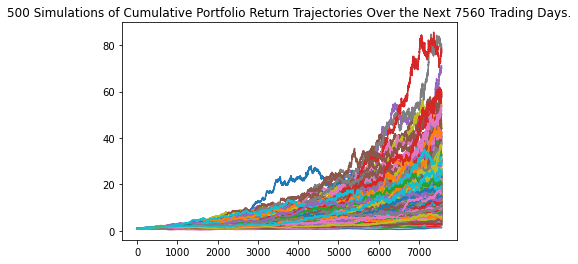

In [12]:
line_plot = MC_30.plot_simulation()

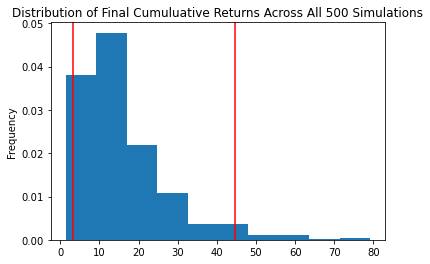

In [13]:
dist_plot = MC_30.plot_distribution()

### Retirement Analysis

In [14]:
summ_stat_30yr = MC_30.summarize_cumulative_return()

summ_stat_30yr

count           500.000000
mean             15.890369
std              11.554690
min               1.395541
25%               8.296387
50%              12.481087
75%              20.084581
max              79.170903
95% CI Lower      3.307866
95% CI Upper     44.751475
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [15]:
initial_investment_30yr = 20000

ci_lower_30yr = round(summ_stat_30yr[8]*initial_investment_30yr,2)
ci_upper_30yr = round(summ_stat_30yr[9]*initial_investment_30yr,2)

print(f"There is a 95% confidence interval that an initial investment of ${initial_investment_30yr:0.2f} in the portfolio"
      f" over the next 30 years will fall within the range of"
      f" ${ci_lower_30yr:0.2f} and ${ci_upper_30yr:0.2f}")

There is a 95% confidence interval that an initial investment of $20000.00 in the portfolio over the next 30 years will fall within the range of $66157.32 and $895029.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [16]:
initial_investment_2 = 20000 * 1.5

ci_lower_2 = round(summ_stat_30yr[8]*initial_investment_2,2)
ci_upper_2 = round(summ_stat_30yr[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% confidence interval that an initial investment of ${initial_investment_2:0.2f} in the portfolio"
      f" over the next 30 years will fall within the range of"
      f" ${ci_lower_2:0.2f} and ${ci_upper_2:0.2f}")

There is a 95% confidence interval that an initial investment of $30000.00 in the portfolio over the next 30 years will fall within the range of $99235.98 and $1342544.24


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [17]:
start_date_5yr = pd.Timestamp('2016-03-24', tz='America/New_York').isoformat()
end_date_5yr = pd.Timestamp('2021-03-24', tz='America/New_York').isoformat()

df_stock_data_5yr = api.get_barset(
    tickers,
    timeframe,
    start = start_date_5yr,
    end = end_date_5yr,
    limit = 1000
).df

df_stock_data_5yr.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2017-04-04 00:00:00-04:00  108.61  108.65  108.5200  108.56  1482935  235.00   
2017-04-05 00:00:00-04:00  108.48  108.74  108.4530  108.69  1900282  236.26   
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535  234.95   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826  235.15   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500  235.36   

                                                               
                              high      low   close    volume  
time                                                           
2017-04-04 00:00:00-04:00  235.580  234.555  235.51  43130784  
2017-04-05 00:00:00-04:00  237.390  234.540  234.77  84819899  
2017-04-06 00:00:00-04:00  236.040  234.425  235.39  53559902  
2017-04-07 00:00:00-04:00  236.000  234.640  235.17  53293901  
2017-04-10 00:00:00-04:00  236.255  234.730  235.32  46610548

In [18]:
MC_5 = MCSimulation(
    portfolio_data = df_stock_data_5yr,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_5.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2017-04-04 00:00:00-04:00  108.61  108.65  108.5200  108.56  1482935   
2017-04-05 00:00:00-04:00  108.48  108.74  108.4530  108.69  1900282   
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-04-04 00:00:00-04:00          NaN  235.00  235.580  234.555  235.51   
2017-04-05 00:00:00-04:00     0.001197  236.26  237.390  234.540  234.77   
2017-04-06 00:00:00-04:00    -0.000184  234.95  236.040  234.425  235.39   
2017-04-07 00:00:00-04:00    -0.002116  235.15  236.000  234.640  235.17   
2017-04-10 00:00:00-04:00     0.001199  235.36  236.255  234.730  235.32   

                                                  
                             volume daily_return  
time                                              
2017-04-04 00:00:00-04:00  43130784          NaN  
2017-04-05 00:00:00-04:00  84819899    -0.003142  
2017-04-06 00:00:00-04:00  53559902     0.002641  
2017-04-07 00:00:00-04:00  53293901    -0.000935  
2017-04-10 00:00:00-04:00  46610548     0.000638

In [19]:
MC_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997906,1.016688,1.015909,0.988719,1.008959,0.983320,0.989488,0.994438,0.993754,0.984051,...,0.979495,1.005598,1.011141,0.993221,0.995024,0.979332,1.006328,0.996311,0.997182,1.007365
2,0.993739,1.038310,1.011902,0.999140,1.020257,1.002214,1.000149,0.991295,0.991633,0.989304,...,0.986038,1.020186,1.012983,0.996765,1.011531,0.961221,0.996924,1.006166,0.992310,1.029130
3,0.973806,1.058201,1.030481,1.021114,1.008202,1.016338,0.986469,0.989363,0.983581,0.970830,...,0.981692,1.022087,1.013901,0.986668,1.006277,0.965076,0.993867,1.024558,0.992677,1.029742
4,0.976294,1.071716,1.046375,1.022787,1.001524,1.000658,0.994187,0.999202,1.007286,0.952606,...,0.973872,1.029641,1.038017,1.000773,1.020285,0.983006,0.993077,1.020534,1.011020,1.041270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.220679,1.717881,1.306417,1.370639,2.037624,1.186992,1.613441,1.986863,2.152680,1.578812,...,0.902808,1.555187,1.220549,2.974663,1.746079,1.377992,0.915344,1.218376,1.743296,1.970806
1257,1.202140,1.704416,1.306530,1.353145,2.050119,1.215395,1.608369,1.918925,2.141280,1.567423,...,0.908823,1.562357,1.221603,2.964952,1.751700,1.387116,0.909315,1.213823,1.699976,1.928118
1258,1.189724,1.714177,1.322032,1.346560,2.063994,1.191484,1.608845,1.865962,2.141129,1.574730,...,0.902583,1.584349,1.245714,3.008725,1.744456,1.362082,0.896316,1.226988,1.700801,1.922102
1259,1.192821,1.684477,1.277942,1.354504,2.092930,1.206132,1.612121,1.852108,2.173264,1.567584,...,0.888905,1.607624,1.235056,3.024760,1.745397,1.349475,0.902264,1.232288,1.736062,1.939851


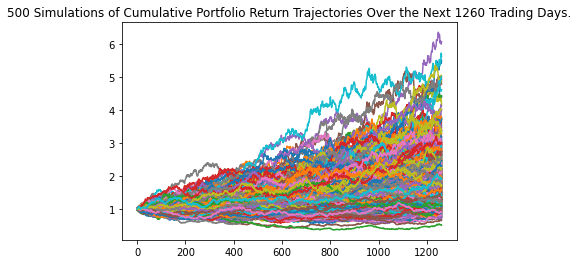

In [20]:
line_plot_5yr = MC_5.plot_simulation()

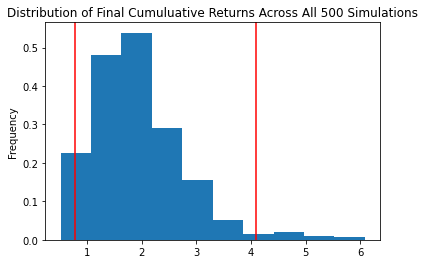

In [21]:
dist_plot_5yr = MC_5.plot_distribution()

In [22]:
summ_stat_5yr = MC_5.summarize_cumulative_return()

summ_stat_5yr

count           500.000000
mean              1.933444
std               0.843594
min               0.513636
25%               1.334137
50%               1.801458
75%               2.389935
max               6.084782
95% CI Lower      0.787338
95% CI Upper      4.087606
Name: 1260, dtype: float64

In [23]:
initial_investment_5yr = 250000

ci_lower_5yr = round(summ_stat_5yr[8]*initial_investment_5yr,2)
ci_upper_5yr = round(summ_stat_5yr[9]*initial_investment_5yr,2)

print(f"There is a 95% confidence interval that an initial investment of ${initial_investment_5yr:0.2f} in the portfolio"
      f" over the next 5 years will fall within the range of"
      f" ${ci_lower_5yr:0.2f} and ${ci_upper_5yr:0.2f}")

There is a 95% confidence interval that an initial investment of $250000.00 in the portfolio over the next 5 years will fall within the range of $196834.62 and $1021901.55


### Ten Years Retirement Option

In [24]:
start_date_10yr = pd.Timestamp('2011-03-24', tz='America/New_York').isoformat()
end_date_10yr = pd.Timestamp('2021-03-24', tz='America/New_York').isoformat()

df_stock_data_10yr = api.get_barset(
    tickers,
    timeframe,
    start = start_date_10yr,
    end = end_date_10yr,
    limit = 1000
).df

df_stock_data_10yr.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2017-04-04 00:00:00-04:00  108.61  108.65  108.5200  108.56  1482935  235.00   
2017-04-05 00:00:00-04:00  108.48  108.74  108.4530  108.69  1900282  236.26   
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535  234.95   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826  235.15   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500  235.36   

                                                               
                              high      low   close    volume  
time                                                           
2017-04-04 00:00:00-04:00  235.580  234.555  235.51  43130784  
2017-04-05 00:00:00-04:00  237.390  234.540  234.77  84819899  
2017-04-06 00:00:00-04:00  236.040  234.425  235.39  53559902  
2017-04-07 00:00:00-04:00  236.000  234.640  235.17  53293901  
2017-04-10 00:00:00-04:00  236.255  234.730  235.32  46610548

In [25]:
MC_10 = MCSimulation(
    portfolio_data = df_stock_data_10yr,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_10.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2017-04-04 00:00:00-04:00  108.61  108.65  108.5200  108.56  1482935   
2017-04-05 00:00:00-04:00  108.48  108.74  108.4530  108.69  1900282   
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-04-04 00:00:00-04:00          NaN  235.00  235.580  234.555  235.51   
2017-04-05 00:00:00-04:00     0.001197  236.26  237.390  234.540  234.77   
2017-04-06 00:00:00-04:00    -0.000184  234.95  236.040  234.425  235.39   
2017-04-07 00:00:00-04:00    -0.002116  235.15  236.000  234.640  235.17   
2017-04-10 00:00:00-04:00     0.001199  235.36  236.255  234.730  235.32   

                                                  
                             volume daily_return  
time                                              
2017-04-04 00:00:00-04:00  43130784          NaN  
2017-04-05 00:00:00-04:00  84819899    -0.003142  
2017-04-06 00:00:00-04:00  53559902     0.002641  
2017-04-07 00:00:00-04:00  53293901    -0.000935  
2017-04-10 00:00:00-04:00  46610548     0.000638

In [26]:
MC_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990962,1.000749,1.005792,0.996691,0.985865,0.995147,0.990072,0.997021,1.011840,1.011079,...,0.995022,0.994918,1.011886,1.003314,0.999512,0.993533,1.002905,0.989808,1.002624,0.998968
2,0.994497,1.002396,0.999696,0.991027,0.980624,0.998182,1.008583,1.002423,1.011404,1.005135,...,0.994535,1.023821,1.010933,0.989906,0.991286,1.000280,1.006448,0.983717,0.997186,0.978113
3,0.988851,1.007429,1.000983,0.985250,0.971738,1.000445,1.009854,0.999787,1.023153,0.993025,...,0.987632,1.027183,1.016190,1.001857,0.979589,0.999026,1.011194,0.985991,1.002441,0.971634
4,0.975419,1.002187,1.011172,1.005016,0.978221,1.015761,1.009619,0.991479,1.029456,0.991263,...,0.995229,1.032184,1.020217,1.007858,0.977425,1.020656,1.016783,0.987252,0.993560,0.971165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.676691,1.575165,3.753420,1.114246,2.774248,5.116716,2.177714,1.008324,5.913576,2.431031,...,3.102610,2.078250,2.626888,1.948167,2.563073,2.831100,2.191942,4.260680,3.508143,3.136459
2517,1.677212,1.578596,3.735208,1.129892,2.761469,5.135061,2.198850,1.000019,5.979603,2.445938,...,3.109595,2.077556,2.610973,1.958396,2.556512,2.850583,2.196940,4.213991,3.515173,3.099799
2518,1.665853,1.572330,3.766471,1.136007,2.735507,5.137798,2.191182,0.998086,6.051536,2.408375,...,3.130880,2.076327,2.602667,1.971223,2.552861,2.861440,2.187006,4.145842,3.469112,3.084546
2519,1.676000,1.561683,3.779734,1.137202,2.779302,5.202448,2.190997,1.005825,6.071443,2.386321,...,3.093998,2.074922,2.637996,1.956220,2.588651,2.901846,2.165837,4.158040,3.502724,3.084970


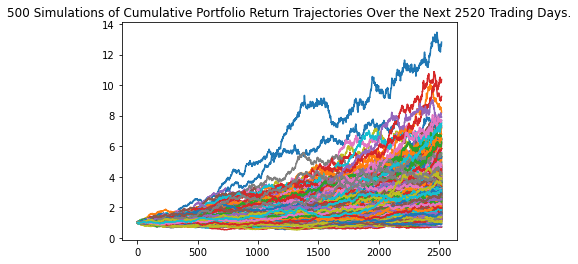

In [27]:
line_plot_10yr = MC_10.plot_simulation()

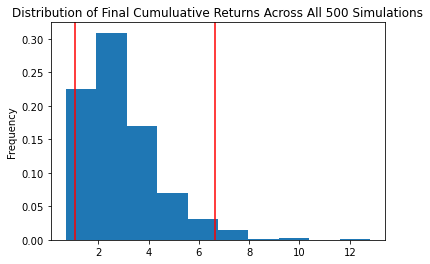

In [28]:
dist_plot_10yr = MC_10.plot_distribution()

In [29]:
summ_stat_10yr = MC_10.summarize_cumulative_return()

summ_stat_10yr

count           500.000000
mean              2.955892
std               1.532481
min               0.709321
25%               1.856361
50%               2.661758
75%               3.688356
max              12.810754
95% CI Lower      1.068103
95% CI Upper      6.646964
Name: 2520, dtype: float64

In [30]:
initial_investment_10yr = 150000

ci_lower_10yr = round(summ_stat_10yr[8]*initial_investment_10yr,2)
ci_upper_10yr = round(summ_stat_10yr[9]*initial_investment_10yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yr:0.2f} in the portfolio"
      f" over the next 10 years will fall within the range of"
      f" ${ci_lower_10yr:0.2f} and ${ci_upper_10yr:0.2f}")

There is a 95% chance that an initial investment of $150000.00 in the portfolio over the next 10 years will fall within the range of $160215.43 and $997044.56
